# What is ADX?

**Average Directional Index (ADX)** is a "technical analysis indicator used by some traders to determine the strength of a trend" (Investopedia). ADX uses a **negative directional indicator (-DI)** to indicate a bear market run. Alternatively, ADX uses a **positive directional indicator (+DI)** to indicate a bull market run.

A **positive directional movement** occurs when the difference between two consecutive highs are greater than the difference between the respective lows. A **negative directional movement** occurs when the difference between two consecutive lows are greater than the difference between the respective highs. The ADX is calculated by the following steps:
1. Calculate the **true range**, the positive directional movement, and the negative directional movement for each time interval.
2. Smooth these values.
3. Divide the 14-day smoothed positive directional movement by the 14-day smoothed true range. Multiply this value by 100% to obtain the **positive directional indicator**.
4. Use a similar process as the previous step to obtain the **negative directional indicator**.
5. Divide the difference of the positive and negative directional indicators by the sum of the positive and negative indicators. Multiply the result by 100. This value is known as the **directional movement index**.
6. To calculate the ADX, take the first value as the 14-day average of the directional movement index. The following values are determined by multiplying the previous value by 13 and adding it to the most recent directional movement index. This value is divided by 14 to obtain the ADX.

*In simpler terms, the ADX is the average of directional movement indices over a 14-day period.*

## Important Notes
- If the positive directional movement is greater than the negative directional movement, then this time period signifies a bull run.
- If the positive directional movement is less than the negative directional movement, then this time period signifies a bear run.
- An ADX greater than 25 to 30 is accepted to be a "strong" trend.

# Implementation
## Step 1: Install libraries

In [1]:
!pip install ta
!pip install yfinance

  Preparing metadata (setup.py) ... - done
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=b0dd4098a06e4f35e5efcb050246fcb0a5b9c559e23d6fa22f4a5e7a2c196ea6
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=46394aa8feb940a506eb2b4d38e29dc29798a16176135df90924a049ddb54f0d
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from numpy.ma.core import size

## Step 2: Retrieve BTC-USD dataset from the Yahoo Finance API
Yahoo Finance is used to retrieve the historical price values. In this walkthrough, we use BTC-USD. Feel free to experiment with other tickers and time periods. These values are aggregated into a Pandas dataframe.

In [3]:
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="2y", actions=False)
df = pd.DataFrame(hist)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-19,9727.063477,9836.047852,9539.624023,9729.038086,39254288955
2020-05-20,9725.329102,9804.793945,9447.201172,9522.981445,36546239703
2020-05-21,9522.740234,9555.242188,8869.930664,9081.761719,39326160532
2020-05-22,9080.334961,9232.936523,9008.638672,9182.577148,29810773699
2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,27727866812
...,...,...,...,...,...
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,25835372065
2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,32613897286
2022-05-17,29862.408203,30694.490234,29570.302734,30425.857422,29101473475


## Step 3: Calculate ADX and aggregate dataframe
The ADXIndicator() function provided by the imported Technical Analysis library provides smooth calculations for the positive directional movement, negative directional movement, and ADX. These values are appended to the corresponding tuple in the dataframe.

In [4]:
adxI = ADXIndicator(df['High'], df['Low'], df['Close'],14,False)
df['+DM'] = adxI.adx_pos()
df['-DM'] = adxI.adx_neg()
df['adx'] = adxI.adx()
df.tail()

/opt/conda/lib/python3.7/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/opt/conda/lib/python3.7/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,+DM,-DM,adx
Date,,,,,,,,
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,25835372065,12.258263,33.536878,41.838530
2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,32613897286,11.370474,32.080933,42.254599
2022-05-17,29862.408203,30694.490234,29570.302734,30425.857422,29101473475,10.904847,30.767201,42.640949
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,31285268319,10.149012,31.738117,43.276677
2022-05-19,28781.103516,29231.947266,28708.955078,29148.798828,32637851648,9.944521,31.142229,43.870669


## Step 4: Plot price chart with bear/bull markers
The chart below visualizes at which points the market was calculated to be either a bull or bear run. The bull market is symbolized as a blue upwards-pointing triange and a bear market is a red downwards-pointing triangle.

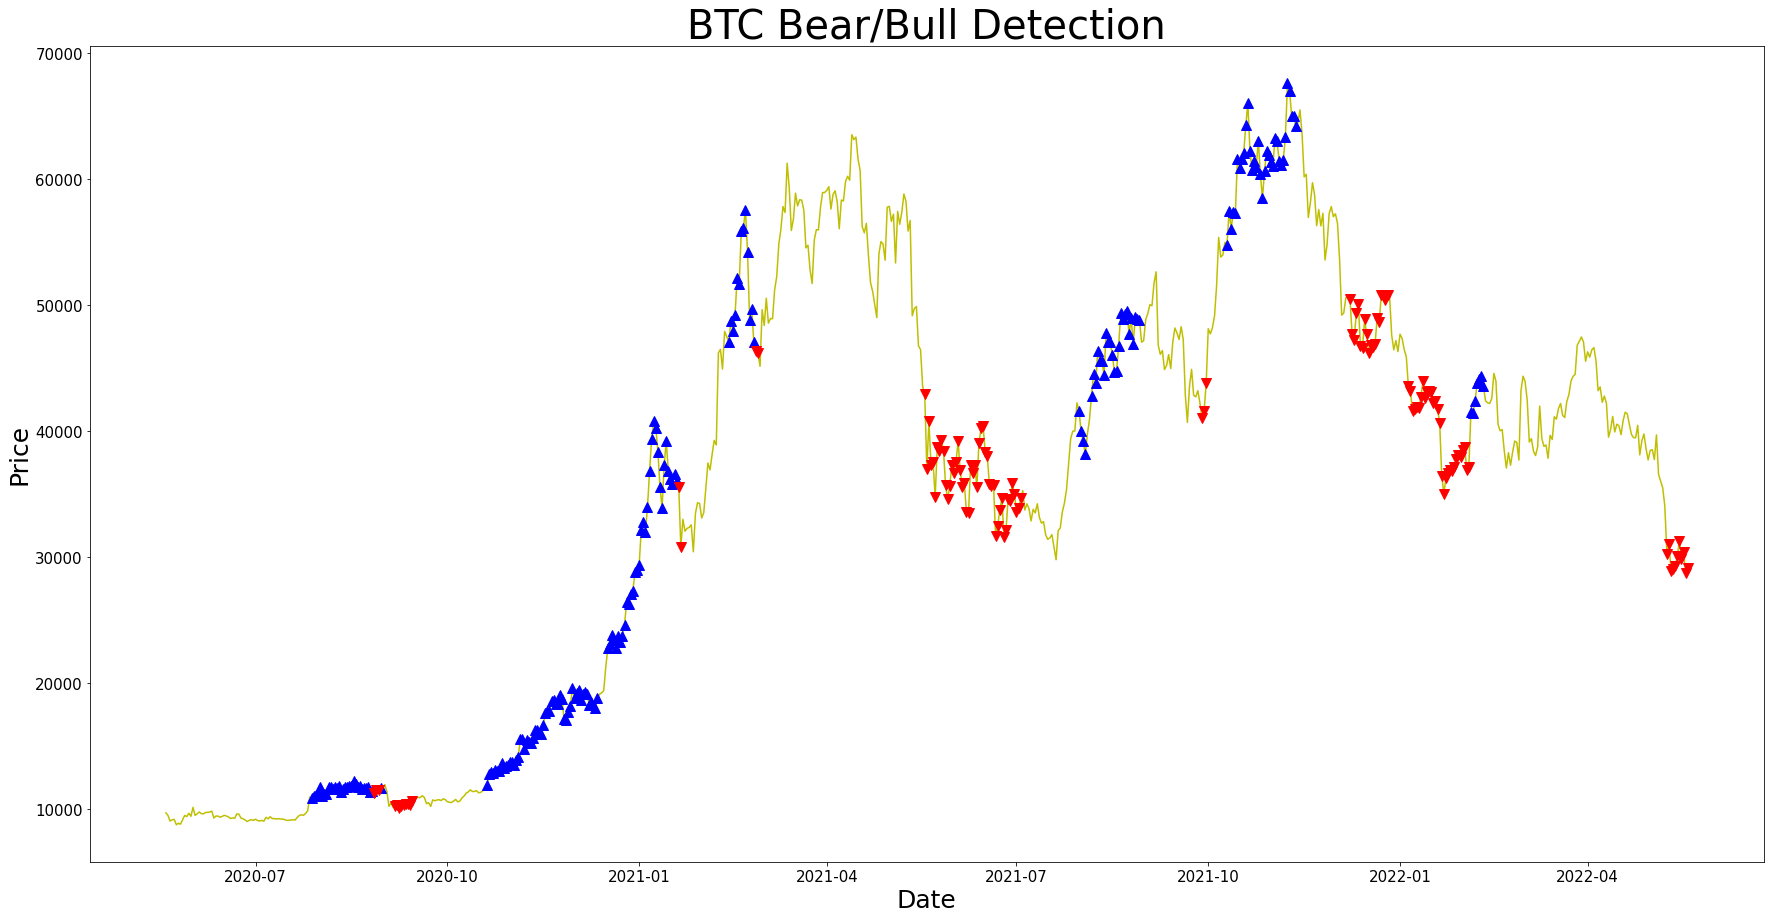

In [5]:
plt.figure(figsize=(30,15))
plt.plot(df['Close'], color = 'y')
for i in df.index:
  if (df['+DM'][i] > df['-DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, y, '^', markersize=10, color='b', label = 'Bull Run')
for i in df.index:
  if (df['-DM'][i] > df['+DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, y, 'v', markersize=10, color='r', label = 'Bear Run')
plt.title('BTC Bear/Bull Detection', fontdict={'fontsize': 40})
plt.xlabel('Date', fontdict={'fontsize': 25})
plt.ylabel('Price', fontdict={'fontsize': 25})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Step 5: Plot the occurrence of bear/bull markets over time
The chart below illustrates the occurence of a bear or bull market over a period of time. Alternativenly, this chart is synonomous to the one above, except with no dependent variable.

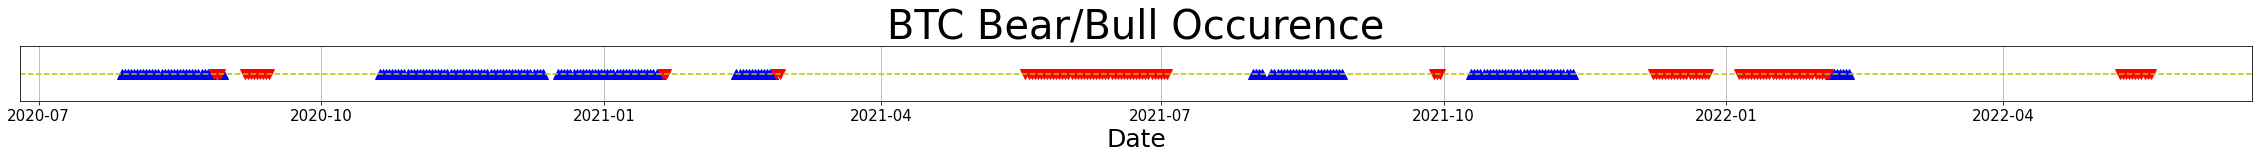

In [6]:
plt.figure(figsize=(40,1))
for i in df.index:
  if (df['+DM'][i] > df['-DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, 0, '^', markersize=10, color='b', label = 'Bull Run')
for i in df.index:
  if (df['-DM'][i] > df['+DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, 0, 'v', markersize=10, color='r', label = 'Bear Run')
plt.title('BTC Bear/Bull Occurence', fontdict={'fontsize': 40})
plt.xlabel('Date', fontdict={'fontsize': 25})
plt.xticks(size=15)
plt.gca().set_yticks([])
plt.yticks([])
ax = plt.gca()
ax.set_yticks([])
ax.axhline(linestyle='--', color='y')
plt.grid()
plt.show()

# Final Words
These are open-source scripts and may be used as pleased (credit is appreciated). Feel free to share your own versions in the comments!